In [1]:
# strategies

### Note I don't have to do all of these, maybe pick 2-3 that seem the most interesting

# Bayes approach, try a specific number of casts and select the one with the most fish

    # if there are ties, you could just randomly choose one, or you could do tournament style

    # between the tied lures

# Cast until you catch a fish, or until another lure has caught a fish sooner

# Make n casts until you don't catch a fish, then rotate

#

In [2]:
# make a cool visualization of the relationships between the various elements of the problem

 

# e.g., shorter time frame, more earning, less learning

# Closer payouts, harder to differentiate payouts, smaller difference between optimal strategy

# Less frequent payouts, each unit of learning learns less

# Switching cost, iterative learning is more expensive

# moving payouts, learning gets dated and needs to be done again

    #-- switching costs makes things even more complicated

In [82]:
import numpy as np
import random
from matplotlib import pyplot as plt

 

class MultiArmedFish():

   

    def __init__(self, lures, casts = 300):
        
        '''
            lures (dict) : dictionary containing the name of a lure 
                           with its corresponding catch probability
            casts (int)  : number of casts that will be taken in a given
                           fishing trip
        
        '''

        self.lures = lures
        self.casts = casts

        return
    
    def random_start(self):
        
        '''
            choose one lure from attribute lures and return it with its 
            catch probability
            
            inputs: None
            
            outputs:
                random_lure (str) : dictionary key of randomly selected lure
                catr_prob (float) : probability of catching a fish for each cast
                                    with the lure (payout probability)
            
        '''
        
        random_lure, catch_prob = random.choice(list(self.lures.items()))
        
        return random_lure, catch_prob

   
    def multiple_simulations(self, strategy, iterations, **kwargs):
        
        '''
            Takes a strategy and runs in multiple times to get an 
            average number of catches for the strategy.
            
            inputs:
                strategy (str)      : name of the strategy - each name
                                      ties to a specific metric
                iterations (int)    : number of scenarios or 'fishing trips'
                                      to be run
                other key word args : any additional arguments needed for 
                                      specific strategies
        '''
        
        simulation_results = []
        
        for cast in range(0, iterations):
            
            if strategy == 'optimal':
                
                cast_success = self.optimal_strategy()
                
            elif strategy == 'one_round_learn':
                
                cast_success = self.one_round_learn(**kwargs)
                
            simulation_results.append(np.sum(cast_success))
            
        print(f'mean catch = {np.mean(simulation_results)}')
        print(f'historgram of fish caught with {strategy} strategy')
        plt.hist(simulation_results)
        plt.show() 
        
        return
    
    def simulate_cast(self, lure_pct, n = 1):
        
        '''
            Simple function to simulate a single cast using uniform random
            variable.
            
            inputs:
                lure_pct (float) : probability of catching with a specific
                                   lure
                n (int)          : number of casts to be simulated
                                   
            outputs:
                If n == 1:
                    catch_bool (bool) : True for catch, False for no catch
                If n > 1:
                    cast_success (list) : list of booleans for all n casts
        '''
        
        # run for single cast
        if n == 1:
            rand_num = np.random.uniform()
                
            if lure_pct >= rand_num:
                catch_bool = True
            
            else:
                catch_bool = False
            
            return catch_bool
        
        # run for multiple casts
        if n > 1:
            
            # create array of uniform numbers
            cast_values = np.random.uniform(size=n)
            cast_success = np.where(cast_values < lure_pct, True, False)
            
            return cast_success
        
    

    def optimal_strategy(self):
        
        '''
            Serves as the benchmark to compare all strategies to.
            It simply selects the highest probability (which wouldn't be 
            known if practices) and only casts with that.
            
            inputs: None
            outputs: 
                cast_success (list) : list of 1's and 0's representing if a cast
                                      caught a fish or not
        
        '''

        lure_with_max_payout = max(self.lures, key=lambda key: lures[key])
        max_payout = self.lures[lure_with_max_payout]

        cast_success = self.simulate_cast(max_payout, n = self.casts)
   
        return cast_success


    def epsilon_greedy(self, epsilon):
        
        '''
            Starts with a random lure and gathers data on it,
            with a probability of epsilon at each cast, change the lure
            and gather data.  With a probability of 1-epsilon go back to 
            the lure with the highest payout
            
            inputs:
                epsilon (float) : probability used to randomly switch lures
                
            outputs:
                cast_success (list) : list of 1's and 0's representing if a cast
                                      caught a fish or not
        
        '''
        
        # create a dictionary to keep track of observed catches
        obs_catch_dict = {}
        
        # start with a random lure
        curr_lure, curr_lure_pct = random_start()
        
        # populate dictionary with the first lure - give it an empty list as
        # the element
        obs_catch_dict[curr_lure] = []
        
        # simulate the first cast
        
        
        # for the remaining casts, use the epsilon-greedy approach
       # for cast in range(0, self.casts - 1):
            
       

    def one_round_learn(self, num_tests):

        test_payouts = {}
        cast_count = 0

        # test each lure to decide which one to use for the
        # rest of the casts
        for lure in self.lures:

            lure_pct = self.lures[lure]
            catch_list = []

            for test_cast in range(0, num_tests):

                cast_count += 1
                
                catch_bool = self.simulate_cast(lure_pct)
                catch_list.append(catch_bool)


            # now that test for this lure is done, count successes
            catches = np.sum(catch_list)
            test_payouts[lure] = catches
            
        # get highest catching lure
        best_lure = max(test_payouts, key=test_payouts.get)
        best_lure_pct = lures[best_lure]

        # now use remaining casts with the best lure from tests
        for remaining_cast in range(0, self.casts - cast_count):
                        
            catch_bool_best = self.simulate_cast(best_lure_pct)
            catch_list.append(catch_bool_best)

            
        catch_success = np.sum(catch_list)

        return catch_list
    
    
    # Time to first catch
    def time_to_first_catch(self, early_stop):
        
        # fish with a lure until you catch one
        # keep track of how long it took to catch
        # switch lure and fish until catch another is caught,
        # or it takes longer than the prior best
        # early_stop switches to another lure if you have taken
        # more than that many casts
        
        # randomly select a lure
        random_lure, catch_prob = random.choice(list(self.lures.items()))
        
        return
    
    
    def top_n(self, n):
        
        # finds top n performers and rotates through them
        # a few time until it finds the best overall
        
        return



In [83]:
        lures = {'crank bait' : 0.2,
         'spinner' : 0.01,
         'soft plastic' : 0.15,
         'rooster' : 0.10,
         'jerk bait' : 0.05}

mean catch = 60.25333333333333
historgram of fish caught with optimal strategy


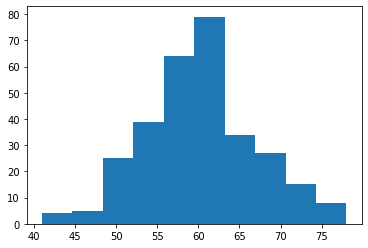

In [84]:
casts = 300
test_cast = MultiArmedFish(lures, casts)
test_cast.multiple_simulations('optimal', 300)



mean catch = 47.67
historgram of fish caught with one_round_learn strategy


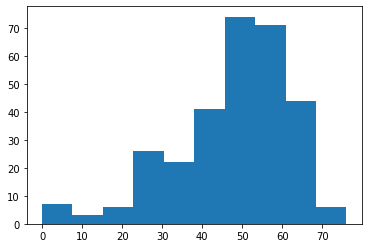

In [85]:
test_cast.multiple_simulations('one_round_learn', 300, num_tests = 5)

mean catch = 49.24
historgram of fish caught with one_round_learn strategy


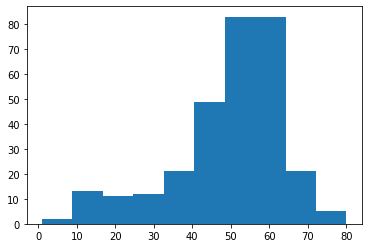

In [86]:
test_cast.multiple_simulations('one_round_learn', 300, num_tests = 3)